##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0-rc0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [6]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [7]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [9]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [10]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

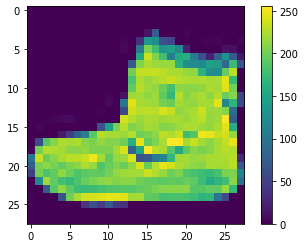

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

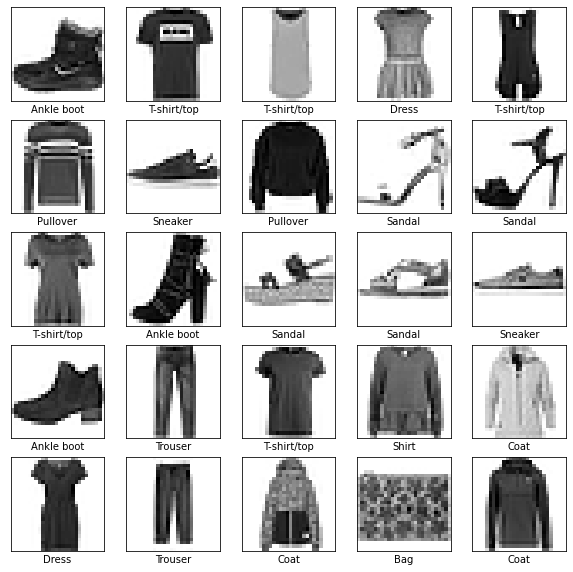

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


   1/1875 [..............................] - ETA: 22:07 - loss: 2.6437 - accuracy: 0.0625

  24/1875 [..............................] - ETA: 4s - loss: 1.4591 - accuracy: 0.5469   

  48/1875 [..............................] - ETA: 3s - loss: 1.1670 - accuracy: 0.6237

  75/1875 [>.............................] - ETA: 3s - loss: 1.0274 - accuracy: 0.6637

 101/1875 [>.............................] - ETA: 3s - loss: 0.9570 - accuracy: 0.6841

 127/1875 [=>............................] - ETA: 3s - loss: 0.8866 - accuracy: 0.7037

 153/1875 [=>............................] - ETA: 3s - loss: 0.8394 - accuracy: 0.7151

 178/1875 [=>............................] - ETA: 3s - loss: 0.8102 - accuracy: 0.7240

 204/1875 [==>...........................] - ETA: 3s - loss: 0.7917 - accuracy: 0.7287

 231/1875 [==>...........................] - ETA: 3s - loss: 0.7616 - accuracy: 0.7390

 258/1875 [===>..........................] - ETA: 3s - loss: 0.7412 - accuracy: 0.7473

 284/1875 [===>..........................] - ETA: 3s - loss: 0.7246 - accuracy: 0.7525

 310/1875 [===>..........................] - ETA: 3s - loss: 0.7104 - accuracy: 0.7573

 336/1875 [====>.........................] - ETA: 3s - loss: 0.6975 - accuracy: 0.7613

 363/1875 [====>.........................] - ETA: 2s - loss: 0.6878 - accuracy: 0.7634

 389/1875 [=====>........................] - ETA: 2s - loss: 0.6771 - accuracy: 0.7672

 414/1875 [=====>........................] - ETA: 2s - loss: 0.6721 - accuracy: 0.7683

 440/1875 [======>.......................] - ETA: 2s - loss: 0.6618 - accuracy: 0.7713

 465/1875 [======>.......................] - ETA: 2s - loss: 0.6539 - accuracy: 0.7749

 491/1875 [======>.......................] - ETA: 2s - loss: 0.6438 - accuracy: 0.7779

 516/1875 [=======>......................] - ETA: 2s - loss: 0.6357 - accuracy: 0.7812

 542/1875 [=======>......................] - ETA: 2s - loss: 0.6297 - accuracy: 0.7827

 567/1875 [========>.....................] - ETA: 2s - loss: 0.6234 - accuracy: 0.7847

 593/1875 [========>.....................] - ETA: 2s - loss: 0.6145 - accuracy: 0.7878

 620/1875 [========>.....................] - ETA: 2s - loss: 0.6095 - accuracy: 0.7899

 646/1875 [=========>....................] - ETA: 2s - loss: 0.6035 - accuracy: 0.7919

 672/1875 [=========>....................] - ETA: 2s - loss: 0.5976 - accuracy: 0.7934

 698/1875 [==========>...................] - ETA: 2s - loss: 0.5954 - accuracy: 0.7941

 724/1875 [==========>...................] - ETA: 2s - loss: 0.5921 - accuracy: 0.7951

 749/1875 [==========>...................] - ETA: 2s - loss: 0.5886 - accuracy: 0.7963

 775/1875 [===========>..................] - ETA: 2s - loss: 0.5852 - accuracy: 0.7976

 801/1875 [===========>..................] - ETA: 2s - loss: 0.5832 - accuracy: 0.7982

 827/1875 [============>.................] - ETA: 2s - loss: 0.5792 - accuracy: 0.7995

 853/1875 [============>.................] - ETA: 2s - loss: 0.5761 - accuracy: 0.8004

 879/1875 [=============>................] - ETA: 1s - loss: 0.5737 - accuracy: 0.8010

 905/1875 [=============>................] - ETA: 1s - loss: 0.5687 - accuracy: 0.8026

 931/1875 [=============>................] - ETA: 1s - loss: 0.5643 - accuracy: 0.8041

 956/1875 [==============>...............] - ETA: 1s - loss: 0.5623 - accuracy: 0.8049

 981/1875 [==============>...............] - ETA: 1s - loss: 0.5605 - accuracy: 0.8052

1006/1875 [===============>..............] - ETA: 1s - loss: 0.5576 - accuracy: 0.8064

1031/1875 [===============>..............] - ETA: 1s - loss: 0.5533 - accuracy: 0.8080

1057/1875 [===============>..............] - ETA: 1s - loss: 0.5526 - accuracy: 0.8084

1083/1875 [================>.............] - ETA: 1s - loss: 0.5506 - accuracy: 0.8090

1109/1875 [================>.............] - ETA: 1s - loss: 0.5479 - accuracy: 0.8100

1135/1875 [=================>............] - ETA: 1s - loss: 0.5461 - accuracy: 0.8108

1161/1875 [=================>............] - ETA: 1s - loss: 0.5434 - accuracy: 0.8115

1188/1875 [==================>...........] - ETA: 1s - loss: 0.5407 - accuracy: 0.8123

1212/1875 [==================>...........] - ETA: 1s - loss: 0.5386 - accuracy: 0.8129

1237/1875 [==================>...........] - ETA: 1s - loss: 0.5357 - accuracy: 0.8139

1263/1875 [===================>..........] - ETA: 1s - loss: 0.5335 - accuracy: 0.8146

1289/1875 [===================>..........] - ETA: 1s - loss: 0.5315 - accuracy: 0.8150

1315/1875 [====================>.........] - ETA: 1s - loss: 0.5296 - accuracy: 0.8155

1341/1875 [====================>.........] - ETA: 1s - loss: 0.5277 - accuracy: 0.8164

1368/1875 [====================>.........] - ETA: 1s - loss: 0.5264 - accuracy: 0.8168

1395/1875 [=====================>........] - ETA: 0s - loss: 0.5235 - accuracy: 0.8178

1422/1875 [=====================>........] - ETA: 0s - loss: 0.5213 - accuracy: 0.8184

1449/1875 [======================>.......] - ETA: 0s - loss: 0.5200 - accuracy: 0.8189

1474/1875 [======================>.......] - ETA: 0s - loss: 0.5186 - accuracy: 0.8194

1499/1875 [======================>.......] - ETA: 0s - loss: 0.5171 - accuracy: 0.8198

1525/1875 [=======================>......] - ETA: 0s - loss: 0.5151 - accuracy: 0.8203

1550/1875 [=======================>......] - ETA: 0s - loss: 0.5132 - accuracy: 0.8209

1576/1875 [========================>.....] - ETA: 0s - loss: 0.5118 - accuracy: 0.8213

1602/1875 [========================>.....] - ETA: 0s - loss: 0.5113 - accuracy: 0.8217

1628/1875 [=========================>....] - ETA: 0s - loss: 0.5091 - accuracy: 0.8224

1655/1875 [=========================>....] - ETA: 0s - loss: 0.5075 - accuracy: 0.8228

1680/1875 [=========================>....] - ETA: 0s - loss: 0.5070 - accuracy: 0.8230

1706/1875 [==========================>...] - ETA: 0s - loss: 0.5055 - accuracy: 0.8234

1731/1875 [==========================>...] - ETA: 0s - loss: 0.5047 - accuracy: 0.8236

1757/1875 [===========================>..] - ETA: 0s - loss: 0.5027 - accuracy: 0.8242

1782/1875 [===========================>..] - ETA: 0s - loss: 0.5017 - accuracy: 0.8245

1808/1875 [===========================>..] - ETA: 0s - loss: 0.5009 - accuracy: 0.8248

1833/1875 [============================>.] - ETA: 0s - loss: 0.4998 - accuracy: 0.8251

1859/1875 [============================>.] - ETA: 0s - loss: 0.4989 - accuracy: 0.8254

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4990 - accuracy: 0.8255


Epoch 2/10


   1/1875 [..............................] - ETA: 4s - loss: 0.6826 - accuracy: 0.7500

  27/1875 [..............................] - ETA: 3s - loss: 0.4197 - accuracy: 0.8507

  54/1875 [..............................] - ETA: 3s - loss: 0.3956 - accuracy: 0.8588

  80/1875 [>.............................] - ETA: 3s - loss: 0.3951 - accuracy: 0.8602

 106/1875 [>.............................] - ETA: 3s - loss: 0.4033 - accuracy: 0.8558

 132/1875 [=>............................] - ETA: 3s - loss: 0.3985 - accuracy: 0.8565

 159/1875 [=>............................] - ETA: 3s - loss: 0.3991 - accuracy: 0.8551

 185/1875 [=>............................] - ETA: 3s - loss: 0.3943 - accuracy: 0.8573

 211/1875 [==>...........................] - ETA: 3s - loss: 0.3873 - accuracy: 0.8596

 238/1875 [==>...........................] - ETA: 3s - loss: 0.3898 - accuracy: 0.8598

 263/1875 [===>..........................] - ETA: 3s - loss: 0.3852 - accuracy: 0.8612

 288/1875 [===>..........................] - ETA: 3s - loss: 0.3870 - accuracy: 0.8611

 314/1875 [====>.........................] - ETA: 3s - loss: 0.3872 - accuracy: 0.8609

 339/1875 [====>.........................] - ETA: 3s - loss: 0.3859 - accuracy: 0.8621

 363/1875 [====>.........................] - ETA: 2s - loss: 0.3861 - accuracy: 0.8613

 389/1875 [=====>........................] - ETA: 2s - loss: 0.3879 - accuracy: 0.8622

 414/1875 [=====>........................] - ETA: 2s - loss: 0.3869 - accuracy: 0.8625

 440/1875 [======>.......................] - ETA: 2s - loss: 0.3887 - accuracy: 0.8616

 467/1875 [======>.......................] - ETA: 2s - loss: 0.3869 - accuracy: 0.8615

 493/1875 [======>.......................] - ETA: 2s - loss: 0.3857 - accuracy: 0.8623

 518/1875 [=======>......................] - ETA: 2s - loss: 0.3860 - accuracy: 0.8614

 544/1875 [=======>......................] - ETA: 2s - loss: 0.3867 - accuracy: 0.8614

 570/1875 [========>.....................] - ETA: 2s - loss: 0.3872 - accuracy: 0.8613

 595/1875 [========>.....................] - ETA: 2s - loss: 0.3872 - accuracy: 0.8614

 620/1875 [========>.....................] - ETA: 2s - loss: 0.3899 - accuracy: 0.8606

 646/1875 [=========>....................] - ETA: 2s - loss: 0.3886 - accuracy: 0.8610

 671/1875 [=========>....................] - ETA: 2s - loss: 0.3873 - accuracy: 0.8619

 698/1875 [==========>...................] - ETA: 2s - loss: 0.3855 - accuracy: 0.8626

 722/1875 [==========>...................] - ETA: 2s - loss: 0.3848 - accuracy: 0.8627

 746/1875 [==========>...................] - ETA: 2s - loss: 0.3847 - accuracy: 0.8626

 771/1875 [===========>..................] - ETA: 2s - loss: 0.3850 - accuracy: 0.8622

 797/1875 [===========>..................] - ETA: 2s - loss: 0.3842 - accuracy: 0.8628

 822/1875 [============>.................] - ETA: 2s - loss: 0.3842 - accuracy: 0.8625

 847/1875 [============>.................] - ETA: 2s - loss: 0.3832 - accuracy: 0.8630

 873/1875 [============>.................] - ETA: 1s - loss: 0.3840 - accuracy: 0.8623

 898/1875 [=============>................] - ETA: 1s - loss: 0.3834 - accuracy: 0.8628

 924/1875 [=============>................] - ETA: 1s - loss: 0.3836 - accuracy: 0.8629

 949/1875 [==============>...............] - ETA: 1s - loss: 0.3842 - accuracy: 0.8628

 975/1875 [==============>...............] - ETA: 1s - loss: 0.3839 - accuracy: 0.8631

1000/1875 [===============>..............] - ETA: 1s - loss: 0.3835 - accuracy: 0.8633

1025/1875 [===============>..............] - ETA: 1s - loss: 0.3835 - accuracy: 0.8632

1050/1875 [===============>..............] - ETA: 1s - loss: 0.3830 - accuracy: 0.8636

1076/1875 [================>.............] - ETA: 1s - loss: 0.3825 - accuracy: 0.8637

1102/1875 [================>.............] - ETA: 1s - loss: 0.3831 - accuracy: 0.8635

1129/1875 [=================>............] - ETA: 1s - loss: 0.3828 - accuracy: 0.8638

1155/1875 [=================>............] - ETA: 1s - loss: 0.3823 - accuracy: 0.8642

1181/1875 [=================>............] - ETA: 1s - loss: 0.3817 - accuracy: 0.8644

1206/1875 [==================>...........] - ETA: 1s - loss: 0.3821 - accuracy: 0.8643

1231/1875 [==================>...........] - ETA: 1s - loss: 0.3817 - accuracy: 0.8643

1256/1875 [===================>..........] - ETA: 1s - loss: 0.3808 - accuracy: 0.8646

1281/1875 [===================>..........] - ETA: 1s - loss: 0.3793 - accuracy: 0.8652

1306/1875 [===================>..........] - ETA: 1s - loss: 0.3782 - accuracy: 0.8655

1330/1875 [====================>.........] - ETA: 1s - loss: 0.3785 - accuracy: 0.8656

1355/1875 [====================>.........] - ETA: 1s - loss: 0.3779 - accuracy: 0.8659

1380/1875 [=====================>........] - ETA: 0s - loss: 0.3778 - accuracy: 0.8660

1405/1875 [=====================>........] - ETA: 0s - loss: 0.3775 - accuracy: 0.8662

1429/1875 [=====================>........] - ETA: 0s - loss: 0.3773 - accuracy: 0.8664

1454/1875 [======================>.......] - ETA: 0s - loss: 0.3773 - accuracy: 0.8664

1480/1875 [======================>.......] - ETA: 0s - loss: 0.3770 - accuracy: 0.8666

1505/1875 [=======================>......] - ETA: 0s - loss: 0.3776 - accuracy: 0.8663

1530/1875 [=======================>......] - ETA: 0s - loss: 0.3773 - accuracy: 0.8666

1556/1875 [=======================>......] - ETA: 0s - loss: 0.3770 - accuracy: 0.8667

1582/1875 [========================>.....] - ETA: 0s - loss: 0.3768 - accuracy: 0.8666

1608/1875 [========================>.....] - ETA: 0s - loss: 0.3765 - accuracy: 0.8667

1634/1875 [=========================>....] - ETA: 0s - loss: 0.3763 - accuracy: 0.8668

1660/1875 [=========================>....] - ETA: 0s - loss: 0.3765 - accuracy: 0.8666

1685/1875 [=========================>....] - ETA: 0s - loss: 0.3763 - accuracy: 0.8666

1710/1875 [==========================>...] - ETA: 0s - loss: 0.3759 - accuracy: 0.8668

1735/1875 [==========================>...] - ETA: 0s - loss: 0.3757 - accuracy: 0.8668

1760/1875 [===========================>..] - ETA: 0s - loss: 0.3765 - accuracy: 0.8667

1784/1875 [===========================>..] - ETA: 0s - loss: 0.3760 - accuracy: 0.8668

1809/1875 [===========================>..] - ETA: 0s - loss: 0.3755 - accuracy: 0.8670

1834/1875 [============================>.] - ETA: 0s - loss: 0.3753 - accuracy: 0.8671

1859/1875 [============================>.] - ETA: 0s - loss: 0.3757 - accuracy: 0.8668

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3755 - accuracy: 0.8668


Epoch 3/10


   1/1875 [..............................] - ETA: 5s - loss: 0.2878 - accuracy: 0.9688

  27/1875 [..............................] - ETA: 3s - loss: 0.2974 - accuracy: 0.8970

  54/1875 [..............................] - ETA: 3s - loss: 0.3034 - accuracy: 0.8900

  79/1875 [>.............................] - ETA: 3s - loss: 0.3083 - accuracy: 0.8904

 103/1875 [>.............................] - ETA: 3s - loss: 0.3209 - accuracy: 0.8835

 129/1875 [=>............................] - ETA: 3s - loss: 0.3205 - accuracy: 0.8820

 155/1875 [=>............................] - ETA: 3s - loss: 0.3211 - accuracy: 0.8819

 182/1875 [=>............................] - ETA: 3s - loss: 0.3255 - accuracy: 0.8793

 208/1875 [==>...........................] - ETA: 3s - loss: 0.3237 - accuracy: 0.8816

 234/1875 [==>...........................] - ETA: 3s - loss: 0.3265 - accuracy: 0.8809

 260/1875 [===>..........................] - ETA: 3s - loss: 0.3353 - accuracy: 0.8779

 287/1875 [===>..........................] - ETA: 3s - loss: 0.3391 - accuracy: 0.8763

 315/1875 [====>.........................] - ETA: 3s - loss: 0.3390 - accuracy: 0.8757

 341/1875 [====>.........................] - ETA: 3s - loss: 0.3369 - accuracy: 0.8766

 368/1875 [====>.........................] - ETA: 2s - loss: 0.3347 - accuracy: 0.8774

 394/1875 [=====>........................] - ETA: 2s - loss: 0.3371 - accuracy: 0.8764

 420/1875 [=====>........................] - ETA: 2s - loss: 0.3350 - accuracy: 0.8772

 446/1875 [======>.......................] - ETA: 2s - loss: 0.3348 - accuracy: 0.8772

 472/1875 [======>.......................] - ETA: 2s - loss: 0.3354 - accuracy: 0.8775

 499/1875 [======>.......................] - ETA: 2s - loss: 0.3364 - accuracy: 0.8781

 526/1875 [=======>......................] - ETA: 2s - loss: 0.3384 - accuracy: 0.8780

 553/1875 [=======>......................] - ETA: 2s - loss: 0.3367 - accuracy: 0.8782

 579/1875 [========>.....................] - ETA: 2s - loss: 0.3375 - accuracy: 0.8781

 605/1875 [========>.....................] - ETA: 2s - loss: 0.3365 - accuracy: 0.8789

 631/1875 [=========>....................] - ETA: 2s - loss: 0.3369 - accuracy: 0.8791

 658/1875 [=========>....................] - ETA: 2s - loss: 0.3376 - accuracy: 0.8790

 684/1875 [=========>....................] - ETA: 2s - loss: 0.3357 - accuracy: 0.8799

 709/1875 [==========>...................] - ETA: 2s - loss: 0.3353 - accuracy: 0.8805

 735/1875 [==========>...................] - ETA: 2s - loss: 0.3356 - accuracy: 0.8804

 761/1875 [===========>..................] - ETA: 2s - loss: 0.3355 - accuracy: 0.8802

 788/1875 [===========>..................] - ETA: 2s - loss: 0.3359 - accuracy: 0.8798

 815/1875 [============>.................] - ETA: 2s - loss: 0.3357 - accuracy: 0.8801

 842/1875 [============>.................] - ETA: 2s - loss: 0.3358 - accuracy: 0.8801

 869/1875 [============>.................] - ETA: 1s - loss: 0.3345 - accuracy: 0.8803

 896/1875 [=============>................] - ETA: 1s - loss: 0.3340 - accuracy: 0.8805

 922/1875 [=============>................] - ETA: 1s - loss: 0.3346 - accuracy: 0.8804

 948/1875 [==============>...............] - ETA: 1s - loss: 0.3348 - accuracy: 0.8803

 975/1875 [==============>...............] - ETA: 1s - loss: 0.3341 - accuracy: 0.8804

1000/1875 [===============>..............] - ETA: 1s - loss: 0.3336 - accuracy: 0.8807

1026/1875 [===============>..............] - ETA: 1s - loss: 0.3331 - accuracy: 0.8807

1053/1875 [===============>..............] - ETA: 1s - loss: 0.3333 - accuracy: 0.8809

1080/1875 [================>.............] - ETA: 1s - loss: 0.3337 - accuracy: 0.8808

1106/1875 [================>.............] - ETA: 1s - loss: 0.3334 - accuracy: 0.8808

1132/1875 [=================>............] - ETA: 1s - loss: 0.3333 - accuracy: 0.8808

1159/1875 [=================>............] - ETA: 1s - loss: 0.3327 - accuracy: 0.8809

1185/1875 [=================>............] - ETA: 1s - loss: 0.3321 - accuracy: 0.8810

1211/1875 [==================>...........] - ETA: 1s - loss: 0.3327 - accuracy: 0.8807

1237/1875 [==================>...........] - ETA: 1s - loss: 0.3337 - accuracy: 0.8804

1264/1875 [===================>..........] - ETA: 1s - loss: 0.3343 - accuracy: 0.8803

1289/1875 [===================>..........] - ETA: 1s - loss: 0.3346 - accuracy: 0.8802

1315/1875 [====================>.........] - ETA: 1s - loss: 0.3355 - accuracy: 0.8798

1341/1875 [====================>.........] - ETA: 1s - loss: 0.3359 - accuracy: 0.8795

1368/1875 [====================>.........] - ETA: 0s - loss: 0.3361 - accuracy: 0.8794

1394/1875 [=====================>........] - ETA: 0s - loss: 0.3361 - accuracy: 0.8795

1421/1875 [=====================>........] - ETA: 0s - loss: 0.3367 - accuracy: 0.8793

1446/1875 [======================>.......] - ETA: 0s - loss: 0.3364 - accuracy: 0.8793

1471/1875 [======================>.......] - ETA: 0s - loss: 0.3364 - accuracy: 0.8791

1495/1875 [======================>.......] - ETA: 0s - loss: 0.3366 - accuracy: 0.8790

1519/1875 [=======================>......] - ETA: 0s - loss: 0.3370 - accuracy: 0.8786

1544/1875 [=======================>......] - ETA: 0s - loss: 0.3366 - accuracy: 0.8786

1570/1875 [========================>.....] - ETA: 0s - loss: 0.3366 - accuracy: 0.8787

1595/1875 [========================>.....] - ETA: 0s - loss: 0.3370 - accuracy: 0.8784

1620/1875 [========================>.....] - ETA: 0s - loss: 0.3369 - accuracy: 0.8784

1646/1875 [=========================>....] - ETA: 0s - loss: 0.3374 - accuracy: 0.8782

1671/1875 [=========================>....] - ETA: 0s - loss: 0.3377 - accuracy: 0.8781

1696/1875 [==========================>...] - ETA: 0s - loss: 0.3388 - accuracy: 0.8778

1721/1875 [==========================>...] - ETA: 0s - loss: 0.3390 - accuracy: 0.8778

1746/1875 [==========================>...] - ETA: 0s - loss: 0.3386 - accuracy: 0.8779

1772/1875 [===========================>..] - ETA: 0s - loss: 0.3389 - accuracy: 0.8777

1797/1875 [===========================>..] - ETA: 0s - loss: 0.3397 - accuracy: 0.8775

1822/1875 [============================>.] - ETA: 0s - loss: 0.3402 - accuracy: 0.8774

1848/1875 [============================>.] - ETA: 0s - loss: 0.3406 - accuracy: 0.8772

1873/1875 [============================>.] - ETA: 0s - loss: 0.3415 - accuracy: 0.8768

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3415 - accuracy: 0.8769


Epoch 4/10


   1/1875 [..............................] - ETA: 5s - loss: 0.3425 - accuracy: 0.9062

  27/1875 [..............................] - ETA: 3s - loss: 0.3013 - accuracy: 0.8877

  53/1875 [..............................] - ETA: 3s - loss: 0.2977 - accuracy: 0.8933

  79/1875 [>.............................] - ETA: 3s - loss: 0.3051 - accuracy: 0.8896

 104/1875 [>.............................] - ETA: 3s - loss: 0.3125 - accuracy: 0.8858

 130/1875 [=>............................] - ETA: 3s - loss: 0.3144 - accuracy: 0.8856

 156/1875 [=>............................] - ETA: 3s - loss: 0.3106 - accuracy: 0.8862

 183/1875 [=>............................] - ETA: 3s - loss: 0.3135 - accuracy: 0.8852

 209/1875 [==>...........................] - ETA: 3s - loss: 0.3148 - accuracy: 0.8841

 234/1875 [==>...........................] - ETA: 3s - loss: 0.3155 - accuracy: 0.8858

 260/1875 [===>..........................] - ETA: 3s - loss: 0.3127 - accuracy: 0.8867

 285/1875 [===>..........................] - ETA: 3s - loss: 0.3136 - accuracy: 0.8864

 310/1875 [===>..........................] - ETA: 3s - loss: 0.3142 - accuracy: 0.8860

 336/1875 [====>.........................] - ETA: 3s - loss: 0.3181 - accuracy: 0.8843

 362/1875 [====>.........................] - ETA: 2s - loss: 0.3203 - accuracy: 0.8828

 387/1875 [=====>........................] - ETA: 2s - loss: 0.3199 - accuracy: 0.8823

 413/1875 [=====>........................] - ETA: 2s - loss: 0.3166 - accuracy: 0.8836

 438/1875 [======>.......................] - ETA: 2s - loss: 0.3159 - accuracy: 0.8839

 465/1875 [======>.......................] - ETA: 2s - loss: 0.3172 - accuracy: 0.8840

 491/1875 [======>.......................] - ETA: 2s - loss: 0.3192 - accuracy: 0.8837

 517/1875 [=======>......................] - ETA: 2s - loss: 0.3185 - accuracy: 0.8839

 543/1875 [=======>......................] - ETA: 2s - loss: 0.3187 - accuracy: 0.8836

 569/1875 [========>.....................] - ETA: 2s - loss: 0.3196 - accuracy: 0.8832

 595/1875 [========>.....................] - ETA: 2s - loss: 0.3200 - accuracy: 0.8831

 620/1875 [========>.....................] - ETA: 2s - loss: 0.3189 - accuracy: 0.8834

 645/1875 [=========>....................] - ETA: 2s - loss: 0.3202 - accuracy: 0.8828

 670/1875 [=========>....................] - ETA: 2s - loss: 0.3209 - accuracy: 0.8828

 695/1875 [==========>...................] - ETA: 2s - loss: 0.3222 - accuracy: 0.8827

 720/1875 [==========>...................] - ETA: 2s - loss: 0.3240 - accuracy: 0.8825

 745/1875 [==========>...................] - ETA: 2s - loss: 0.3234 - accuracy: 0.8823

 771/1875 [===========>..................] - ETA: 2s - loss: 0.3220 - accuracy: 0.8829

 796/1875 [===========>..................] - ETA: 2s - loss: 0.3212 - accuracy: 0.8832

 821/1875 [============>.................] - ETA: 2s - loss: 0.3200 - accuracy: 0.8835

 847/1875 [============>.................] - ETA: 2s - loss: 0.3190 - accuracy: 0.8839

 872/1875 [============>.................] - ETA: 1s - loss: 0.3179 - accuracy: 0.8843

 897/1875 [=============>................] - ETA: 1s - loss: 0.3182 - accuracy: 0.8842

 922/1875 [=============>................] - ETA: 1s - loss: 0.3176 - accuracy: 0.8845

 947/1875 [==============>...............] - ETA: 1s - loss: 0.3186 - accuracy: 0.8842

 972/1875 [==============>...............] - ETA: 1s - loss: 0.3169 - accuracy: 0.8848

 998/1875 [==============>...............] - ETA: 1s - loss: 0.3176 - accuracy: 0.8847

1023/1875 [===============>..............] - ETA: 1s - loss: 0.3172 - accuracy: 0.8847

1048/1875 [===============>..............] - ETA: 1s - loss: 0.3160 - accuracy: 0.8854

1074/1875 [================>.............] - ETA: 1s - loss: 0.3150 - accuracy: 0.8856

1099/1875 [================>.............] - ETA: 1s - loss: 0.3151 - accuracy: 0.8857

1125/1875 [=================>............] - ETA: 1s - loss: 0.3139 - accuracy: 0.8860

1151/1875 [=================>............] - ETA: 1s - loss: 0.3135 - accuracy: 0.8863

1175/1875 [=================>............] - ETA: 1s - loss: 0.3129 - accuracy: 0.8865

1200/1875 [==================>...........] - ETA: 1s - loss: 0.3137 - accuracy: 0.8860

1226/1875 [==================>...........] - ETA: 1s - loss: 0.3144 - accuracy: 0.8860

1251/1875 [===================>..........] - ETA: 1s - loss: 0.3144 - accuracy: 0.8859

1277/1875 [===================>..........] - ETA: 1s - loss: 0.3154 - accuracy: 0.8855

1302/1875 [===================>..........] - ETA: 1s - loss: 0.3146 - accuracy: 0.8858

1327/1875 [====================>.........] - ETA: 1s - loss: 0.3144 - accuracy: 0.8860

1353/1875 [====================>.........] - ETA: 1s - loss: 0.3145 - accuracy: 0.8859

1380/1875 [=====================>........] - ETA: 0s - loss: 0.3142 - accuracy: 0.8862

1406/1875 [=====================>........] - ETA: 0s - loss: 0.3148 - accuracy: 0.8860

1432/1875 [=====================>........] - ETA: 0s - loss: 0.3145 - accuracy: 0.8860

1457/1875 [======================>.......] - ETA: 0s - loss: 0.3142 - accuracy: 0.8858

1483/1875 [======================>.......] - ETA: 0s - loss: 0.3142 - accuracy: 0.8857

1510/1875 [=======================>......] - ETA: 0s - loss: 0.3143 - accuracy: 0.8854

1536/1875 [=======================>......] - ETA: 0s - loss: 0.3141 - accuracy: 0.8856

1562/1875 [=======================>......] - ETA: 0s - loss: 0.3141 - accuracy: 0.8854

1588/1875 [========================>.....] - ETA: 0s - loss: 0.3131 - accuracy: 0.8859

1614/1875 [========================>.....] - ETA: 0s - loss: 0.3136 - accuracy: 0.8857

1640/1875 [=========================>....] - ETA: 0s - loss: 0.3138 - accuracy: 0.8856

1666/1875 [=========================>....] - ETA: 0s - loss: 0.3143 - accuracy: 0.8854

1693/1875 [==========================>...] - ETA: 0s - loss: 0.3143 - accuracy: 0.8853

1719/1875 [==========================>...] - ETA: 0s - loss: 0.3143 - accuracy: 0.8855

1745/1875 [==========================>...] - ETA: 0s - loss: 0.3147 - accuracy: 0.8853

1772/1875 [===========================>..] - ETA: 0s - loss: 0.3144 - accuracy: 0.8854

1797/1875 [===========================>..] - ETA: 0s - loss: 0.3147 - accuracy: 0.8852

1822/1875 [============================>.] - ETA: 0s - loss: 0.3148 - accuracy: 0.8851

1849/1875 [============================>.] - ETA: 0s - loss: 0.3138 - accuracy: 0.8854

1875/1875 [==============================] - ETA: 0s - loss: 0.3135 - accuracy: 0.8854

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3135 - accuracy: 0.8854


Epoch 5/10


   1/1875 [..............................] - ETA: 5s - loss: 0.2769 - accuracy: 0.8750

  27/1875 [..............................] - ETA: 3s - loss: 0.3216 - accuracy: 0.8831

  53/1875 [..............................] - ETA: 3s - loss: 0.3406 - accuracy: 0.8726

  77/1875 [>.............................] - ETA: 3s - loss: 0.3212 - accuracy: 0.8831

 103/1875 [>.............................] - ETA: 3s - loss: 0.3140 - accuracy: 0.8829

 129/1875 [=>............................] - ETA: 3s - loss: 0.3055 - accuracy: 0.8861

 155/1875 [=>............................] - ETA: 3s - loss: 0.3151 - accuracy: 0.8833

 182/1875 [=>............................] - ETA: 3s - loss: 0.3166 - accuracy: 0.8844

 207/1875 [==>...........................] - ETA: 3s - loss: 0.3140 - accuracy: 0.8851

 233/1875 [==>...........................] - ETA: 3s - loss: 0.3118 - accuracy: 0.8851

 258/1875 [===>..........................] - ETA: 3s - loss: 0.3085 - accuracy: 0.8852

 285/1875 [===>..........................] - ETA: 3s - loss: 0.3110 - accuracy: 0.8851

 311/1875 [===>..........................] - ETA: 3s - loss: 0.3096 - accuracy: 0.8844

 337/1875 [====>.........................] - ETA: 3s - loss: 0.3112 - accuracy: 0.8833

 363/1875 [====>.........................] - ETA: 2s - loss: 0.3109 - accuracy: 0.8834

 390/1875 [=====>........................] - ETA: 2s - loss: 0.3102 - accuracy: 0.8833

 416/1875 [=====>........................] - ETA: 2s - loss: 0.3096 - accuracy: 0.8831

 442/1875 [======>.......................] - ETA: 2s - loss: 0.3082 - accuracy: 0.8841

 468/1875 [======>.......................] - ETA: 2s - loss: 0.3076 - accuracy: 0.8841

 495/1875 [======>.......................] - ETA: 2s - loss: 0.3111 - accuracy: 0.8840

 521/1875 [=======>......................] - ETA: 2s - loss: 0.3096 - accuracy: 0.8840

 547/1875 [=======>......................] - ETA: 2s - loss: 0.3104 - accuracy: 0.8837

 572/1875 [========>.....................] - ETA: 2s - loss: 0.3090 - accuracy: 0.8847

 599/1875 [========>.....................] - ETA: 2s - loss: 0.3094 - accuracy: 0.8845

 626/1875 [=========>....................] - ETA: 2s - loss: 0.3074 - accuracy: 0.8852

 652/1875 [=========>....................] - ETA: 2s - loss: 0.3070 - accuracy: 0.8858

 678/1875 [=========>....................] - ETA: 2s - loss: 0.3071 - accuracy: 0.8859

 704/1875 [==========>...................] - ETA: 2s - loss: 0.3055 - accuracy: 0.8868

 730/1875 [==========>...................] - ETA: 2s - loss: 0.3054 - accuracy: 0.8866

 755/1875 [===========>..................] - ETA: 2s - loss: 0.3049 - accuracy: 0.8871

 781/1875 [===========>..................] - ETA: 2s - loss: 0.3048 - accuracy: 0.8874

 807/1875 [===========>..................] - ETA: 2s - loss: 0.3040 - accuracy: 0.8878

 833/1875 [============>.................] - ETA: 2s - loss: 0.3034 - accuracy: 0.8878

 861/1875 [============>.................] - ETA: 1s - loss: 0.3025 - accuracy: 0.8879

 887/1875 [=============>................] - ETA: 1s - loss: 0.3029 - accuracy: 0.8880

 913/1875 [=============>................] - ETA: 1s - loss: 0.3031 - accuracy: 0.8879

 939/1875 [==============>...............] - ETA: 1s - loss: 0.3035 - accuracy: 0.8877

 966/1875 [==============>...............] - ETA: 1s - loss: 0.3028 - accuracy: 0.8880

 993/1875 [==============>...............] - ETA: 1s - loss: 0.3027 - accuracy: 0.8880

1019/1875 [===============>..............] - ETA: 1s - loss: 0.3028 - accuracy: 0.8880

1043/1875 [===============>..............] - ETA: 1s - loss: 0.3029 - accuracy: 0.8882

1069/1875 [================>.............] - ETA: 1s - loss: 0.3024 - accuracy: 0.8883

1093/1875 [================>.............] - ETA: 1s - loss: 0.3024 - accuracy: 0.8885

1118/1875 [================>.............] - ETA: 1s - loss: 0.3020 - accuracy: 0.8887

1143/1875 [=================>............] - ETA: 1s - loss: 0.3021 - accuracy: 0.8886

1169/1875 [=================>............] - ETA: 1s - loss: 0.3029 - accuracy: 0.8885

1195/1875 [==================>...........] - ETA: 1s - loss: 0.3034 - accuracy: 0.8884

1220/1875 [==================>...........] - ETA: 1s - loss: 0.3042 - accuracy: 0.8886

1246/1875 [==================>...........] - ETA: 1s - loss: 0.3039 - accuracy: 0.8886

1273/1875 [===================>..........] - ETA: 1s - loss: 0.3036 - accuracy: 0.8885

1298/1875 [===================>..........] - ETA: 1s - loss: 0.3037 - accuracy: 0.8885

1324/1875 [====================>.........] - ETA: 1s - loss: 0.3036 - accuracy: 0.8886

1350/1875 [====================>.........] - ETA: 1s - loss: 0.3036 - accuracy: 0.8884

1376/1875 [=====================>........] - ETA: 0s - loss: 0.3031 - accuracy: 0.8889

1403/1875 [=====================>........] - ETA: 0s - loss: 0.3021 - accuracy: 0.8890

1430/1875 [=====================>........] - ETA: 0s - loss: 0.3016 - accuracy: 0.8893

1457/1875 [======================>.......] - ETA: 0s - loss: 0.3009 - accuracy: 0.8896

1483/1875 [======================>.......] - ETA: 0s - loss: 0.3009 - accuracy: 0.8895

1509/1875 [=======================>......] - ETA: 0s - loss: 0.2998 - accuracy: 0.8901

1534/1875 [=======================>......] - ETA: 0s - loss: 0.3001 - accuracy: 0.8899

1559/1875 [=======================>......] - ETA: 0s - loss: 0.3006 - accuracy: 0.8897

1585/1875 [========================>.....] - ETA: 0s - loss: 0.3003 - accuracy: 0.8899

1610/1875 [========================>.....] - ETA: 0s - loss: 0.2999 - accuracy: 0.8899

1636/1875 [=========================>....] - ETA: 0s - loss: 0.2995 - accuracy: 0.8901

1662/1875 [=========================>....] - ETA: 0s - loss: 0.2992 - accuracy: 0.8900

1689/1875 [==========================>...] - ETA: 0s - loss: 0.2992 - accuracy: 0.8901

1715/1875 [==========================>...] - ETA: 0s - loss: 0.2981 - accuracy: 0.8904

1741/1875 [==========================>...] - ETA: 0s - loss: 0.2987 - accuracy: 0.8902

1766/1875 [===========================>..] - ETA: 0s - loss: 0.2985 - accuracy: 0.8902

1792/1875 [===========================>..] - ETA: 0s - loss: 0.2986 - accuracy: 0.8901

1816/1875 [============================>.] - ETA: 0s - loss: 0.2981 - accuracy: 0.8902

1841/1875 [============================>.] - ETA: 0s - loss: 0.2986 - accuracy: 0.8901

1866/1875 [============================>.] - ETA: 0s - loss: 0.2987 - accuracy: 0.8901

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2987 - accuracy: 0.8901


Epoch 6/10


   1/1875 [..............................] - ETA: 4s - loss: 0.5586 - accuracy: 0.7812

  25/1875 [..............................] - ETA: 3s - loss: 0.3010 - accuracy: 0.8938

  51/1875 [..............................] - ETA: 3s - loss: 0.2730 - accuracy: 0.9032

  76/1875 [>.............................] - ETA: 3s - loss: 0.2759 - accuracy: 0.9005

 102/1875 [>.............................] - ETA: 3s - loss: 0.2819 - accuracy: 0.8992

 127/1875 [=>............................] - ETA: 3s - loss: 0.2816 - accuracy: 0.8969

 153/1875 [=>............................] - ETA: 3s - loss: 0.2835 - accuracy: 0.8956

 178/1875 [=>............................] - ETA: 3s - loss: 0.2840 - accuracy: 0.8931

 203/1875 [==>...........................] - ETA: 3s - loss: 0.2824 - accuracy: 0.8929

 228/1875 [==>...........................] - ETA: 3s - loss: 0.2845 - accuracy: 0.8932

 254/1875 [===>..........................] - ETA: 3s - loss: 0.2842 - accuracy: 0.8930

 281/1875 [===>..........................] - ETA: 3s - loss: 0.2804 - accuracy: 0.8941

 307/1875 [===>..........................] - ETA: 3s - loss: 0.2811 - accuracy: 0.8941

 334/1875 [====>.........................] - ETA: 3s - loss: 0.2798 - accuracy: 0.8937

 358/1875 [====>.........................] - ETA: 3s - loss: 0.2782 - accuracy: 0.8939

 383/1875 [=====>........................] - ETA: 2s - loss: 0.2774 - accuracy: 0.8938

 408/1875 [=====>........................] - ETA: 2s - loss: 0.2770 - accuracy: 0.8940

 434/1875 [=====>........................] - ETA: 2s - loss: 0.2764 - accuracy: 0.8950

 459/1875 [======>.......................] - ETA: 2s - loss: 0.2769 - accuracy: 0.8949

 485/1875 [======>.......................] - ETA: 2s - loss: 0.2796 - accuracy: 0.8946

 511/1875 [=======>......................] - ETA: 2s - loss: 0.2806 - accuracy: 0.8945

 539/1875 [=======>......................] - ETA: 2s - loss: 0.2815 - accuracy: 0.8940

 566/1875 [========>.....................] - ETA: 2s - loss: 0.2818 - accuracy: 0.8940

 594/1875 [========>.....................] - ETA: 2s - loss: 0.2836 - accuracy: 0.8934

 622/1875 [========>.....................] - ETA: 2s - loss: 0.2846 - accuracy: 0.8934

 648/1875 [=========>....................] - ETA: 2s - loss: 0.2865 - accuracy: 0.8933

 673/1875 [=========>....................] - ETA: 2s - loss: 0.2849 - accuracy: 0.8939

 700/1875 [==========>...................] - ETA: 2s - loss: 0.2852 - accuracy: 0.8939

 726/1875 [==========>...................] - ETA: 2s - loss: 0.2866 - accuracy: 0.8934

 752/1875 [===========>..................] - ETA: 2s - loss: 0.2871 - accuracy: 0.8934

 779/1875 [===========>..................] - ETA: 2s - loss: 0.2873 - accuracy: 0.8934

 806/1875 [===========>..................] - ETA: 2s - loss: 0.2871 - accuracy: 0.8934

 833/1875 [============>.................] - ETA: 2s - loss: 0.2871 - accuracy: 0.8937

 860/1875 [============>.................] - ETA: 1s - loss: 0.2876 - accuracy: 0.8933

 886/1875 [=============>................] - ETA: 1s - loss: 0.2868 - accuracy: 0.8939

 912/1875 [=============>................] - ETA: 1s - loss: 0.2871 - accuracy: 0.8938

 938/1875 [==============>...............] - ETA: 1s - loss: 0.2873 - accuracy: 0.8938

 966/1875 [==============>...............] - ETA: 1s - loss: 0.2854 - accuracy: 0.8944

 993/1875 [==============>...............] - ETA: 1s - loss: 0.2849 - accuracy: 0.8944

1018/1875 [===============>..............] - ETA: 1s - loss: 0.2853 - accuracy: 0.8940

1045/1875 [===============>..............] - ETA: 1s - loss: 0.2852 - accuracy: 0.8940

1072/1875 [================>.............] - ETA: 1s - loss: 0.2851 - accuracy: 0.8938

1098/1875 [================>.............] - ETA: 1s - loss: 0.2844 - accuracy: 0.8941

1123/1875 [================>.............] - ETA: 1s - loss: 0.2845 - accuracy: 0.8941

1150/1875 [=================>............] - ETA: 1s - loss: 0.2862 - accuracy: 0.8933

1177/1875 [=================>............] - ETA: 1s - loss: 0.2857 - accuracy: 0.8934

1204/1875 [==================>...........] - ETA: 1s - loss: 0.2869 - accuracy: 0.8930

1231/1875 [==================>...........] - ETA: 1s - loss: 0.2868 - accuracy: 0.8933

1258/1875 [===================>..........] - ETA: 1s - loss: 0.2869 - accuracy: 0.8930

1286/1875 [===================>..........] - ETA: 1s - loss: 0.2870 - accuracy: 0.8928

1312/1875 [===================>..........] - ETA: 1s - loss: 0.2867 - accuracy: 0.8931

1339/1875 [====================>.........] - ETA: 1s - loss: 0.2867 - accuracy: 0.8931

1365/1875 [====================>.........] - ETA: 0s - loss: 0.2866 - accuracy: 0.8933

1392/1875 [=====================>........] - ETA: 0s - loss: 0.2862 - accuracy: 0.8937

1418/1875 [=====================>........] - ETA: 0s - loss: 0.2858 - accuracy: 0.8938

1444/1875 [======================>.......] - ETA: 0s - loss: 0.2856 - accuracy: 0.8940

1471/1875 [======================>.......] - ETA: 0s - loss: 0.2859 - accuracy: 0.8942

1497/1875 [======================>.......] - ETA: 0s - loss: 0.2853 - accuracy: 0.8944

1523/1875 [=======================>......] - ETA: 0s - loss: 0.2850 - accuracy: 0.8944

1550/1875 [=======================>......] - ETA: 0s - loss: 0.2843 - accuracy: 0.8947

1576/1875 [========================>.....] - ETA: 0s - loss: 0.2840 - accuracy: 0.8947

1601/1875 [========================>.....] - ETA: 0s - loss: 0.2833 - accuracy: 0.8950

1627/1875 [=========================>....] - ETA: 0s - loss: 0.2837 - accuracy: 0.8950

1652/1875 [=========================>....] - ETA: 0s - loss: 0.2841 - accuracy: 0.8948

1677/1875 [=========================>....] - ETA: 0s - loss: 0.2841 - accuracy: 0.8948

1701/1875 [==========================>...] - ETA: 0s - loss: 0.2837 - accuracy: 0.8950

1726/1875 [==========================>...] - ETA: 0s - loss: 0.2829 - accuracy: 0.8953

1752/1875 [===========================>..] - ETA: 0s - loss: 0.2826 - accuracy: 0.8953

1778/1875 [===========================>..] - ETA: 0s - loss: 0.2820 - accuracy: 0.8956

1804/1875 [===========================>..] - ETA: 0s - loss: 0.2824 - accuracy: 0.8954

1829/1875 [============================>.] - ETA: 0s - loss: 0.2823 - accuracy: 0.8956

1853/1875 [============================>.] - ETA: 0s - loss: 0.2820 - accuracy: 0.8957

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2821 - accuracy: 0.8957


Epoch 7/10


   1/1875 [..............................] - ETA: 6s - loss: 0.2156 - accuracy: 0.9375

  25/1875 [..............................] - ETA: 3s - loss: 0.2946 - accuracy: 0.8775

  50/1875 [..............................] - ETA: 3s - loss: 0.2802 - accuracy: 0.8906

  75/1875 [>.............................] - ETA: 3s - loss: 0.2757 - accuracy: 0.8913

 100/1875 [>.............................] - ETA: 3s - loss: 0.2738 - accuracy: 0.8938

 125/1875 [=>............................] - ETA: 3s - loss: 0.2663 - accuracy: 0.8982

 150/1875 [=>............................] - ETA: 3s - loss: 0.2690 - accuracy: 0.8983

 175/1875 [=>............................] - ETA: 3s - loss: 0.2681 - accuracy: 0.8982

 199/1875 [==>...........................] - ETA: 3s - loss: 0.2676 - accuracy: 0.8993

 223/1875 [==>...........................] - ETA: 3s - loss: 0.2663 - accuracy: 0.8994

 248/1875 [==>...........................] - ETA: 3s - loss: 0.2659 - accuracy: 0.8997

 273/1875 [===>..........................] - ETA: 3s - loss: 0.2680 - accuracy: 0.8996

 297/1875 [===>..........................] - ETA: 3s - loss: 0.2642 - accuracy: 0.9007

 322/1875 [====>.........................] - ETA: 3s - loss: 0.2599 - accuracy: 0.9031

 347/1875 [====>.........................] - ETA: 3s - loss: 0.2625 - accuracy: 0.9023

 373/1875 [====>.........................] - ETA: 3s - loss: 0.2624 - accuracy: 0.9029

 398/1875 [=====>........................] - ETA: 3s - loss: 0.2619 - accuracy: 0.9029

 423/1875 [=====>........................] - ETA: 2s - loss: 0.2588 - accuracy: 0.9040

 448/1875 [======>.......................] - ETA: 2s - loss: 0.2621 - accuracy: 0.9025

 472/1875 [======>.......................] - ETA: 2s - loss: 0.2620 - accuracy: 0.9027

 498/1875 [======>.......................] - ETA: 2s - loss: 0.2626 - accuracy: 0.9030

 523/1875 [=======>......................] - ETA: 2s - loss: 0.2646 - accuracy: 0.9024

 548/1875 [=======>......................] - ETA: 2s - loss: 0.2634 - accuracy: 0.9027

 572/1875 [========>.....................] - ETA: 2s - loss: 0.2642 - accuracy: 0.9026

 596/1875 [========>.....................] - ETA: 2s - loss: 0.2636 - accuracy: 0.9026

 621/1875 [========>.....................] - ETA: 2s - loss: 0.2636 - accuracy: 0.9021

 646/1875 [=========>....................] - ETA: 2s - loss: 0.2643 - accuracy: 0.9018

 672/1875 [=========>....................] - ETA: 2s - loss: 0.2653 - accuracy: 0.9019

 697/1875 [==========>...................] - ETA: 2s - loss: 0.2666 - accuracy: 0.9011

 722/1875 [==========>...................] - ETA: 2s - loss: 0.2668 - accuracy: 0.9012

 747/1875 [==========>...................] - ETA: 2s - loss: 0.2655 - accuracy: 0.9020

 771/1875 [===========>..................] - ETA: 2s - loss: 0.2662 - accuracy: 0.9015

 795/1875 [===========>..................] - ETA: 2s - loss: 0.2671 - accuracy: 0.9012

 821/1875 [============>.................] - ETA: 2s - loss: 0.2675 - accuracy: 0.9013

 848/1875 [============>.................] - ETA: 2s - loss: 0.2690 - accuracy: 0.9008

 874/1875 [============>.................] - ETA: 2s - loss: 0.2693 - accuracy: 0.9006

 898/1875 [=============>................] - ETA: 1s - loss: 0.2697 - accuracy: 0.9008

 923/1875 [=============>................] - ETA: 1s - loss: 0.2691 - accuracy: 0.9009

 947/1875 [==============>...............] - ETA: 1s - loss: 0.2702 - accuracy: 0.9007

 972/1875 [==============>...............] - ETA: 1s - loss: 0.2698 - accuracy: 0.9008

 997/1875 [==============>...............] - ETA: 1s - loss: 0.2701 - accuracy: 0.9007

1022/1875 [===============>..............] - ETA: 1s - loss: 0.2701 - accuracy: 0.9008

1047/1875 [===============>..............] - ETA: 1s - loss: 0.2695 - accuracy: 0.9009

1072/1875 [================>.............] - ETA: 1s - loss: 0.2695 - accuracy: 0.9010

1096/1875 [================>.............] - ETA: 1s - loss: 0.2697 - accuracy: 0.9009

1122/1875 [================>.............] - ETA: 1s - loss: 0.2702 - accuracy: 0.9007

1146/1875 [=================>............] - ETA: 1s - loss: 0.2701 - accuracy: 0.9009

1172/1875 [=================>............] - ETA: 1s - loss: 0.2696 - accuracy: 0.9011

1198/1875 [==================>...........] - ETA: 1s - loss: 0.2703 - accuracy: 0.9006

1224/1875 [==================>...........] - ETA: 1s - loss: 0.2696 - accuracy: 0.9008

1251/1875 [===================>..........] - ETA: 1s - loss: 0.2701 - accuracy: 0.9007

1276/1875 [===================>..........] - ETA: 1s - loss: 0.2699 - accuracy: 0.9008

1303/1875 [===================>..........] - ETA: 1s - loss: 0.2692 - accuracy: 0.9010

1329/1875 [====================>.........] - ETA: 1s - loss: 0.2693 - accuracy: 0.9012

1355/1875 [====================>.........] - ETA: 1s - loss: 0.2696 - accuracy: 0.9011

1381/1875 [=====================>........] - ETA: 1s - loss: 0.2700 - accuracy: 0.9009

1407/1875 [=====================>........] - ETA: 0s - loss: 0.2696 - accuracy: 0.9011

1433/1875 [=====================>........] - ETA: 0s - loss: 0.2701 - accuracy: 0.9006

1460/1875 [======================>.......] - ETA: 0s - loss: 0.2695 - accuracy: 0.9009

1486/1875 [======================>.......] - ETA: 0s - loss: 0.2693 - accuracy: 0.9009

1511/1875 [=======================>......] - ETA: 0s - loss: 0.2695 - accuracy: 0.9007

1536/1875 [=======================>......] - ETA: 0s - loss: 0.2699 - accuracy: 0.9004

1562/1875 [=======================>......] - ETA: 0s - loss: 0.2699 - accuracy: 0.9004

1587/1875 [========================>.....] - ETA: 0s - loss: 0.2696 - accuracy: 0.9006

1613/1875 [========================>.....] - ETA: 0s - loss: 0.2697 - accuracy: 0.9005

1638/1875 [=========================>....] - ETA: 0s - loss: 0.2700 - accuracy: 0.9002

1663/1875 [=========================>....] - ETA: 0s - loss: 0.2702 - accuracy: 0.9002

1688/1875 [==========================>...] - ETA: 0s - loss: 0.2703 - accuracy: 0.9001

1713/1875 [==========================>...] - ETA: 0s - loss: 0.2700 - accuracy: 0.9003

1739/1875 [==========================>...] - ETA: 0s - loss: 0.2703 - accuracy: 0.9003

1765/1875 [===========================>..] - ETA: 0s - loss: 0.2704 - accuracy: 0.9002

1790/1875 [===========================>..] - ETA: 0s - loss: 0.2702 - accuracy: 0.9004

1816/1875 [============================>.] - ETA: 0s - loss: 0.2703 - accuracy: 0.9004

1841/1875 [============================>.] - ETA: 0s - loss: 0.2704 - accuracy: 0.9003

1867/1875 [============================>.] - ETA: 0s - loss: 0.2702 - accuracy: 0.9005

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2702 - accuracy: 0.9005


Epoch 8/10


   1/1875 [..............................] - ETA: 5s - loss: 0.3814 - accuracy: 0.9062

  26/1875 [..............................] - ETA: 3s - loss: 0.2934 - accuracy: 0.8882

  50/1875 [..............................] - ETA: 3s - loss: 0.2568 - accuracy: 0.9019

  76/1875 [>.............................] - ETA: 3s - loss: 0.2680 - accuracy: 0.8997

 101/1875 [>.............................] - ETA: 3s - loss: 0.2627 - accuracy: 0.9025

 127/1875 [=>............................] - ETA: 3s - loss: 0.2645 - accuracy: 0.9038

 152/1875 [=>............................] - ETA: 3s - loss: 0.2590 - accuracy: 0.9069

 178/1875 [=>............................] - ETA: 3s - loss: 0.2660 - accuracy: 0.9015

 203/1875 [==>...........................] - ETA: 3s - loss: 0.2690 - accuracy: 0.8995

 228/1875 [==>...........................] - ETA: 3s - loss: 0.2715 - accuracy: 0.8978

 253/1875 [===>..........................] - ETA: 3s - loss: 0.2707 - accuracy: 0.8969

 279/1875 [===>..........................] - ETA: 3s - loss: 0.2687 - accuracy: 0.8991

 305/1875 [===>..........................] - ETA: 3s - loss: 0.2677 - accuracy: 0.8992

 330/1875 [====>.........................] - ETA: 3s - loss: 0.2667 - accuracy: 0.8997

 356/1875 [====>.........................] - ETA: 3s - loss: 0.2678 - accuracy: 0.8999

 383/1875 [=====>........................] - ETA: 2s - loss: 0.2650 - accuracy: 0.9010

 409/1875 [=====>........................] - ETA: 2s - loss: 0.2632 - accuracy: 0.9015

 435/1875 [=====>........................] - ETA: 2s - loss: 0.2617 - accuracy: 0.9024

 460/1875 [======>.......................] - ETA: 2s - loss: 0.2637 - accuracy: 0.9016

 485/1875 [======>.......................] - ETA: 2s - loss: 0.2648 - accuracy: 0.9010

 511/1875 [=======>......................] - ETA: 2s - loss: 0.2641 - accuracy: 0.9011

 537/1875 [=======>......................] - ETA: 2s - loss: 0.2638 - accuracy: 0.9016

 562/1875 [=======>......................] - ETA: 2s - loss: 0.2648 - accuracy: 0.9015

 588/1875 [========>.....................] - ETA: 2s - loss: 0.2652 - accuracy: 0.9009

 614/1875 [========>.....................] - ETA: 2s - loss: 0.2645 - accuracy: 0.9013

 640/1875 [=========>....................] - ETA: 2s - loss: 0.2642 - accuracy: 0.9015

 666/1875 [=========>....................] - ETA: 2s - loss: 0.2641 - accuracy: 0.9017

 691/1875 [==========>...................] - ETA: 2s - loss: 0.2627 - accuracy: 0.9021

 717/1875 [==========>...................] - ETA: 2s - loss: 0.2636 - accuracy: 0.9017

 742/1875 [==========>...................] - ETA: 2s - loss: 0.2643 - accuracy: 0.9018

 769/1875 [===========>..................] - ETA: 2s - loss: 0.2654 - accuracy: 0.9010

 794/1875 [===========>..................] - ETA: 2s - loss: 0.2643 - accuracy: 0.9013

 821/1875 [============>.................] - ETA: 2s - loss: 0.2646 - accuracy: 0.9014

 848/1875 [============>.................] - ETA: 2s - loss: 0.2640 - accuracy: 0.9018

 874/1875 [============>.................] - ETA: 1s - loss: 0.2637 - accuracy: 0.9020

 901/1875 [=============>................] - ETA: 1s - loss: 0.2637 - accuracy: 0.9023

 926/1875 [=============>................] - ETA: 1s - loss: 0.2629 - accuracy: 0.9026

 951/1875 [==============>...............] - ETA: 1s - loss: 0.2632 - accuracy: 0.9023

 976/1875 [==============>...............] - ETA: 1s - loss: 0.2635 - accuracy: 0.9021

1003/1875 [===============>..............] - ETA: 1s - loss: 0.2629 - accuracy: 0.9022

1030/1875 [===============>..............] - ETA: 1s - loss: 0.2624 - accuracy: 0.9023

1056/1875 [===============>..............] - ETA: 1s - loss: 0.2623 - accuracy: 0.9026

1082/1875 [================>.............] - ETA: 1s - loss: 0.2625 - accuracy: 0.9026

1107/1875 [================>.............] - ETA: 1s - loss: 0.2627 - accuracy: 0.9024

1132/1875 [=================>............] - ETA: 1s - loss: 0.2622 - accuracy: 0.9027

1158/1875 [=================>............] - ETA: 1s - loss: 0.2621 - accuracy: 0.9029

1184/1875 [=================>............] - ETA: 1s - loss: 0.2623 - accuracy: 0.9030

1209/1875 [==================>...........] - ETA: 1s - loss: 0.2618 - accuracy: 0.9031

1235/1875 [==================>...........] - ETA: 1s - loss: 0.2621 - accuracy: 0.9030

1260/1875 [===================>..........] - ETA: 1s - loss: 0.2617 - accuracy: 0.9030

1286/1875 [===================>..........] - ETA: 1s - loss: 0.2619 - accuracy: 0.9027

1312/1875 [===================>..........] - ETA: 1s - loss: 0.2616 - accuracy: 0.9027

1338/1875 [====================>.........] - ETA: 1s - loss: 0.2613 - accuracy: 0.9028

1363/1875 [====================>.........] - ETA: 1s - loss: 0.2612 - accuracy: 0.9029

1389/1875 [=====================>........] - ETA: 0s - loss: 0.2618 - accuracy: 0.9028

1413/1875 [=====================>........] - ETA: 0s - loss: 0.2612 - accuracy: 0.9029

1438/1875 [======================>.......] - ETA: 0s - loss: 0.2618 - accuracy: 0.9025

1463/1875 [======================>.......] - ETA: 0s - loss: 0.2616 - accuracy: 0.9026

1487/1875 [======================>.......] - ETA: 0s - loss: 0.2620 - accuracy: 0.9025

1511/1875 [=======================>......] - ETA: 0s - loss: 0.2622 - accuracy: 0.9025

1536/1875 [=======================>......] - ETA: 0s - loss: 0.2615 - accuracy: 0.9029

1561/1875 [=======================>......] - ETA: 0s - loss: 0.2615 - accuracy: 0.9029

1586/1875 [========================>.....] - ETA: 0s - loss: 0.2615 - accuracy: 0.9029

1611/1875 [========================>.....] - ETA: 0s - loss: 0.2615 - accuracy: 0.9030

1636/1875 [=========================>....] - ETA: 0s - loss: 0.2612 - accuracy: 0.9032

1661/1875 [=========================>....] - ETA: 0s - loss: 0.2613 - accuracy: 0.9033

1687/1875 [=========================>....] - ETA: 0s - loss: 0.2614 - accuracy: 0.9033

1712/1875 [==========================>...] - ETA: 0s - loss: 0.2617 - accuracy: 0.9030

1737/1875 [==========================>...] - ETA: 0s - loss: 0.2611 - accuracy: 0.9031

1764/1875 [===========================>..] - ETA: 0s - loss: 0.2609 - accuracy: 0.9032

1790/1875 [===========================>..] - ETA: 0s - loss: 0.2611 - accuracy: 0.9033

1815/1875 [============================>.] - ETA: 0s - loss: 0.2607 - accuracy: 0.9035

1841/1875 [============================>.] - ETA: 0s - loss: 0.2613 - accuracy: 0.9033

1868/1875 [============================>.] - ETA: 0s - loss: 0.2609 - accuracy: 0.9035

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2608 - accuracy: 0.9035


Epoch 9/10


   1/1875 [..............................] - ETA: 5s - loss: 0.3078 - accuracy: 0.7812

  27/1875 [..............................] - ETA: 3s - loss: 0.2422 - accuracy: 0.9120

  52/1875 [..............................] - ETA: 3s - loss: 0.2435 - accuracy: 0.9056

  77/1875 [>.............................] - ETA: 3s - loss: 0.2425 - accuracy: 0.9067

 102/1875 [>.............................] - ETA: 3s - loss: 0.2542 - accuracy: 0.9044

 127/1875 [=>............................] - ETA: 3s - loss: 0.2517 - accuracy: 0.9070

 150/1875 [=>............................] - ETA: 3s - loss: 0.2634 - accuracy: 0.9046

 175/1875 [=>............................] - ETA: 3s - loss: 0.2639 - accuracy: 0.9050

 199/1875 [==>...........................] - ETA: 3s - loss: 0.2621 - accuracy: 0.9034

 223/1875 [==>...........................] - ETA: 3s - loss: 0.2620 - accuracy: 0.9047

 249/1875 [==>...........................] - ETA: 3s - loss: 0.2590 - accuracy: 0.9052

 274/1875 [===>..........................] - ETA: 3s - loss: 0.2584 - accuracy: 0.9051

 299/1875 [===>..........................] - ETA: 3s - loss: 0.2606 - accuracy: 0.9045

 325/1875 [====>.........................] - ETA: 3s - loss: 0.2603 - accuracy: 0.9038

 351/1875 [====>.........................] - ETA: 3s - loss: 0.2591 - accuracy: 0.9041

 376/1875 [=====>........................] - ETA: 3s - loss: 0.2572 - accuracy: 0.9039

 402/1875 [=====>........................] - ETA: 2s - loss: 0.2561 - accuracy: 0.9044

 429/1875 [=====>........................] - ETA: 2s - loss: 0.2552 - accuracy: 0.9049

 456/1875 [======>.......................] - ETA: 2s - loss: 0.2540 - accuracy: 0.9053

 482/1875 [======>.......................] - ETA: 2s - loss: 0.2554 - accuracy: 0.9050

 509/1875 [=======>......................] - ETA: 2s - loss: 0.2568 - accuracy: 0.9046

 536/1875 [=======>......................] - ETA: 2s - loss: 0.2537 - accuracy: 0.9060

 562/1875 [=======>......................] - ETA: 2s - loss: 0.2539 - accuracy: 0.9059

 589/1875 [========>.....................] - ETA: 2s - loss: 0.2526 - accuracy: 0.9062

 616/1875 [========>.....................] - ETA: 2s - loss: 0.2528 - accuracy: 0.9065

 643/1875 [=========>....................] - ETA: 2s - loss: 0.2524 - accuracy: 0.9070

 669/1875 [=========>....................] - ETA: 2s - loss: 0.2507 - accuracy: 0.9075

 695/1875 [==========>...................] - ETA: 2s - loss: 0.2510 - accuracy: 0.9078

 720/1875 [==========>...................] - ETA: 2s - loss: 0.2511 - accuracy: 0.9078

 746/1875 [==========>...................] - ETA: 2s - loss: 0.2515 - accuracy: 0.9074

 772/1875 [===========>..................] - ETA: 2s - loss: 0.2497 - accuracy: 0.9080

 799/1875 [===========>..................] - ETA: 2s - loss: 0.2507 - accuracy: 0.9076

 826/1875 [============>.................] - ETA: 2s - loss: 0.2501 - accuracy: 0.9078

 852/1875 [============>.................] - ETA: 2s - loss: 0.2503 - accuracy: 0.9074

 879/1875 [=============>................] - ETA: 1s - loss: 0.2501 - accuracy: 0.9075

 907/1875 [=============>................] - ETA: 1s - loss: 0.2498 - accuracy: 0.9076

 934/1875 [=============>................] - ETA: 1s - loss: 0.2490 - accuracy: 0.9079

 962/1875 [==============>...............] - ETA: 1s - loss: 0.2492 - accuracy: 0.9075

 990/1875 [==============>...............] - ETA: 1s - loss: 0.2498 - accuracy: 0.9071

1016/1875 [===============>..............] - ETA: 1s - loss: 0.2497 - accuracy: 0.9068

1043/1875 [===============>..............] - ETA: 1s - loss: 0.2510 - accuracy: 0.9063

1069/1875 [================>.............] - ETA: 1s - loss: 0.2504 - accuracy: 0.9065

1096/1875 [================>.............] - ETA: 1s - loss: 0.2493 - accuracy: 0.9070

1122/1875 [================>.............] - ETA: 1s - loss: 0.2493 - accuracy: 0.9071

1148/1875 [=================>............] - ETA: 1s - loss: 0.2488 - accuracy: 0.9072

1175/1875 [=================>............] - ETA: 1s - loss: 0.2485 - accuracy: 0.9072

1201/1875 [==================>...........] - ETA: 1s - loss: 0.2486 - accuracy: 0.9074

1228/1875 [==================>...........] - ETA: 1s - loss: 0.2486 - accuracy: 0.9073

1255/1875 [===================>..........] - ETA: 1s - loss: 0.2489 - accuracy: 0.9072

1282/1875 [===================>..........] - ETA: 1s - loss: 0.2491 - accuracy: 0.9071

1308/1875 [===================>..........] - ETA: 1s - loss: 0.2502 - accuracy: 0.9067

1334/1875 [====================>.........] - ETA: 1s - loss: 0.2503 - accuracy: 0.9066

1360/1875 [====================>.........] - ETA: 1s - loss: 0.2501 - accuracy: 0.9068

1386/1875 [=====================>........] - ETA: 0s - loss: 0.2505 - accuracy: 0.9064

1412/1875 [=====================>........] - ETA: 0s - loss: 0.2501 - accuracy: 0.9067

1437/1875 [=====================>........] - ETA: 0s - loss: 0.2507 - accuracy: 0.9064

1462/1875 [======================>.......] - ETA: 0s - loss: 0.2501 - accuracy: 0.9066

1486/1875 [======================>.......] - ETA: 0s - loss: 0.2501 - accuracy: 0.9068

1512/1875 [=======================>......] - ETA: 0s - loss: 0.2496 - accuracy: 0.9068

1537/1875 [=======================>......] - ETA: 0s - loss: 0.2492 - accuracy: 0.9070

1562/1875 [=======================>......] - ETA: 0s - loss: 0.2495 - accuracy: 0.9069

1587/1875 [========================>.....] - ETA: 0s - loss: 0.2496 - accuracy: 0.9068

1612/1875 [========================>.....] - ETA: 0s - loss: 0.2498 - accuracy: 0.9069

1638/1875 [=========================>....] - ETA: 0s - loss: 0.2506 - accuracy: 0.9066

1663/1875 [=========================>....] - ETA: 0s - loss: 0.2505 - accuracy: 0.9067

1688/1875 [==========================>...] - ETA: 0s - loss: 0.2501 - accuracy: 0.9068

1713/1875 [==========================>...] - ETA: 0s - loss: 0.2499 - accuracy: 0.9069

1739/1875 [==========================>...] - ETA: 0s - loss: 0.2497 - accuracy: 0.9070

1765/1875 [===========================>..] - ETA: 0s - loss: 0.2498 - accuracy: 0.9072

1792/1875 [===========================>..] - ETA: 0s - loss: 0.2504 - accuracy: 0.9070

1818/1875 [============================>.] - ETA: 0s - loss: 0.2504 - accuracy: 0.9070

1844/1875 [============================>.] - ETA: 0s - loss: 0.2507 - accuracy: 0.9069

1870/1875 [============================>.] - ETA: 0s - loss: 0.2503 - accuracy: 0.9069

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2505 - accuracy: 0.9068


Epoch 10/10


   1/1875 [..............................] - ETA: 5s - loss: 0.1730 - accuracy: 0.9062

  27/1875 [..............................] - ETA: 3s - loss: 0.2271 - accuracy: 0.9259

  53/1875 [..............................] - ETA: 3s - loss: 0.2572 - accuracy: 0.9092

  79/1875 [>.............................] - ETA: 3s - loss: 0.2498 - accuracy: 0.9114

 105/1875 [>.............................] - ETA: 3s - loss: 0.2430 - accuracy: 0.9119

 131/1875 [=>............................] - ETA: 3s - loss: 0.2469 - accuracy: 0.9084

 158/1875 [=>............................] - ETA: 3s - loss: 0.2475 - accuracy: 0.9086

 183/1875 [=>............................] - ETA: 3s - loss: 0.2450 - accuracy: 0.9086

 209/1875 [==>...........................] - ETA: 3s - loss: 0.2442 - accuracy: 0.9094

 235/1875 [==>...........................] - ETA: 3s - loss: 0.2394 - accuracy: 0.9121

 260/1875 [===>..........................] - ETA: 3s - loss: 0.2401 - accuracy: 0.9108

 285/1875 [===>..........................] - ETA: 3s - loss: 0.2397 - accuracy: 0.9110

 311/1875 [===>..........................] - ETA: 3s - loss: 0.2371 - accuracy: 0.9127

 335/1875 [====>.........................] - ETA: 3s - loss: 0.2356 - accuracy: 0.9127

 360/1875 [====>.........................] - ETA: 3s - loss: 0.2374 - accuracy: 0.9118

 384/1875 [=====>........................] - ETA: 2s - loss: 0.2370 - accuracy: 0.9121

 409/1875 [=====>........................] - ETA: 2s - loss: 0.2381 - accuracy: 0.9118

 433/1875 [=====>........................] - ETA: 2s - loss: 0.2391 - accuracy: 0.9118

 458/1875 [======>.......................] - ETA: 2s - loss: 0.2377 - accuracy: 0.9120

 483/1875 [======>.......................] - ETA: 2s - loss: 0.2383 - accuracy: 0.9122

 508/1875 [=======>......................] - ETA: 2s - loss: 0.2384 - accuracy: 0.9123

 533/1875 [=======>......................] - ETA: 2s - loss: 0.2387 - accuracy: 0.9118

 559/1875 [=======>......................] - ETA: 2s - loss: 0.2395 - accuracy: 0.9118

 586/1875 [========>.....................] - ETA: 2s - loss: 0.2420 - accuracy: 0.9113

 612/1875 [========>.....................] - ETA: 2s - loss: 0.2407 - accuracy: 0.9120

 638/1875 [=========>....................] - ETA: 2s - loss: 0.2421 - accuracy: 0.9112

 662/1875 [=========>....................] - ETA: 2s - loss: 0.2428 - accuracy: 0.9111

 686/1875 [=========>....................] - ETA: 2s - loss: 0.2427 - accuracy: 0.9114

 711/1875 [==========>...................] - ETA: 2s - loss: 0.2423 - accuracy: 0.9116

 736/1875 [==========>...................] - ETA: 2s - loss: 0.2410 - accuracy: 0.9121

 762/1875 [===========>..................] - ETA: 2s - loss: 0.2398 - accuracy: 0.9124

 788/1875 [===========>..................] - ETA: 2s - loss: 0.2397 - accuracy: 0.9128

 813/1875 [============>.................] - ETA: 2s - loss: 0.2389 - accuracy: 0.9128

 839/1875 [============>.................] - ETA: 2s - loss: 0.2387 - accuracy: 0.9129

 864/1875 [============>.................] - ETA: 2s - loss: 0.2391 - accuracy: 0.9128

 890/1875 [=============>................] - ETA: 1s - loss: 0.2391 - accuracy: 0.9127

 916/1875 [=============>................] - ETA: 1s - loss: 0.2387 - accuracy: 0.9129

 942/1875 [==============>...............] - ETA: 1s - loss: 0.2378 - accuracy: 0.9134

 969/1875 [==============>...............] - ETA: 1s - loss: 0.2384 - accuracy: 0.9129

 996/1875 [==============>...............] - ETA: 1s - loss: 0.2393 - accuracy: 0.9125

1022/1875 [===============>..............] - ETA: 1s - loss: 0.2392 - accuracy: 0.9126

1049/1875 [===============>..............] - ETA: 1s - loss: 0.2402 - accuracy: 0.9122

1074/1875 [================>.............] - ETA: 1s - loss: 0.2406 - accuracy: 0.9122

1100/1875 [================>.............] - ETA: 1s - loss: 0.2407 - accuracy: 0.9120

1125/1875 [=================>............] - ETA: 1s - loss: 0.2406 - accuracy: 0.9121

1149/1875 [=================>............] - ETA: 1s - loss: 0.2406 - accuracy: 0.9121

1175/1875 [=================>............] - ETA: 1s - loss: 0.2400 - accuracy: 0.9123

1200/1875 [==================>...........] - ETA: 1s - loss: 0.2402 - accuracy: 0.9123

1227/1875 [==================>...........] - ETA: 1s - loss: 0.2407 - accuracy: 0.9122

1254/1875 [===================>..........] - ETA: 1s - loss: 0.2403 - accuracy: 0.9122

1281/1875 [===================>..........] - ETA: 1s - loss: 0.2414 - accuracy: 0.9120

1307/1875 [===================>..........] - ETA: 1s - loss: 0.2417 - accuracy: 0.9117

1333/1875 [====================>.........] - ETA: 1s - loss: 0.2415 - accuracy: 0.9119

1359/1875 [====================>.........] - ETA: 1s - loss: 0.2412 - accuracy: 0.9120

1384/1875 [=====================>........] - ETA: 0s - loss: 0.2415 - accuracy: 0.9117

1410/1875 [=====================>........] - ETA: 0s - loss: 0.2411 - accuracy: 0.9119

1436/1875 [=====================>........] - ETA: 0s - loss: 0.2412 - accuracy: 0.9119

1462/1875 [======================>.......] - ETA: 0s - loss: 0.2413 - accuracy: 0.9119

1487/1875 [======================>.......] - ETA: 0s - loss: 0.2418 - accuracy: 0.9115

1513/1875 [=======================>......] - ETA: 0s - loss: 0.2419 - accuracy: 0.9115

1539/1875 [=======================>......] - ETA: 0s - loss: 0.2418 - accuracy: 0.9113

1565/1875 [========================>.....] - ETA: 0s - loss: 0.2419 - accuracy: 0.9111

1592/1875 [========================>.....] - ETA: 0s - loss: 0.2418 - accuracy: 0.9113

1618/1875 [========================>.....] - ETA: 0s - loss: 0.2412 - accuracy: 0.9115

1643/1875 [=========================>....] - ETA: 0s - loss: 0.2415 - accuracy: 0.9114

1670/1875 [=========================>....] - ETA: 0s - loss: 0.2413 - accuracy: 0.9114

1696/1875 [==========================>...] - ETA: 0s - loss: 0.2412 - accuracy: 0.9115

1722/1875 [==========================>...] - ETA: 0s - loss: 0.2415 - accuracy: 0.9111

1748/1875 [==========================>...] - ETA: 0s - loss: 0.2413 - accuracy: 0.9112

1774/1875 [===========================>..] - ETA: 0s - loss: 0.2409 - accuracy: 0.9112

1800/1875 [===========================>..] - ETA: 0s - loss: 0.2410 - accuracy: 0.9112

1826/1875 [============================>.] - ETA: 0s - loss: 0.2409 - accuracy: 0.9112

1852/1875 [============================>.] - ETA: 0s - loss: 0.2405 - accuracy: 0.9114

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2402 - accuracy: 0.9115


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3321 - accuracy: 0.8844 - 632ms/epoch - 2ms/step



Test accuracy: 0.8844000101089478


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [20]:
predictions[0]

array([1.6897003e-07, 1.0658376e-06, 8.6763002e-10, 5.3698355e-11,
       7.8622850e-09, 1.0314207e-03, 5.4637178e-07, 6.8362947e-03,
       3.2302161e-09, 9.9213046e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [21]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [22]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

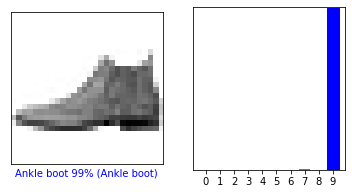

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

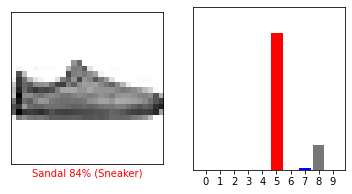

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

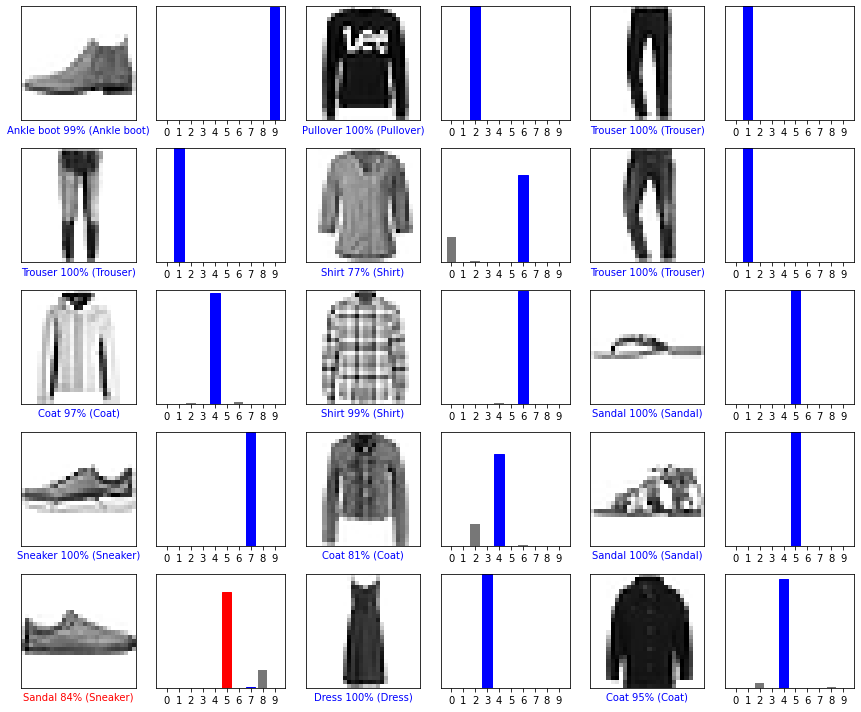

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[9.78697153e-06 2.17143859e-12 9.99807060e-01 4.06722711e-11
  1.72316606e-04 5.10281785e-15 1.08501672e-05 1.01092846e-16
  6.84311277e-14 3.10500600e-16]]


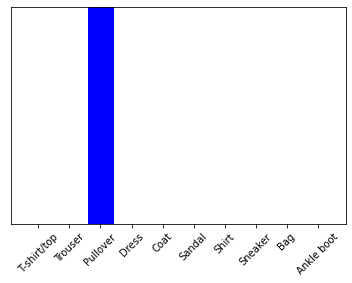

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [31]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.